In [56]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import pickle
from qiskit_machine_learning.utils import algorithm_globals

In [62]:
# Your images conceptually are 2 rows × 4 columns → 8 pixels in total.
# That’s why each image is represented as an 8-element vector in the code. it means code show it at one column.
# e.g., [π/2, π/2, 0, 0, 0, 0, 0, 0] → first row: [π/2, π/2, 0, 0], second row: [0, 0, 0, 0].
# so for making 2 adjacent  horizontally, algorithm should choose one i and the next one: so it can not choose i=3 & i=7(why) : so there are 6 possible ways
# and for making 2 adjacent vertically, algorithm should choose one i and i+4 for: so there are 4 possible ways

def generate_dataset(num_images):
    images = []
    labels = []
    hor_array = np.zeros((6, 8))
#   6 possible horizontal line patterns.
    ver_array = np.zeros((4, 8))
#   4 possible vertical line patterns.

#   That creates 6 unique horizontal patterns, each having two bright spots (π/2) next to each other in different positions except i = 3.
    j = 0
    for i in range(0, 7):
        if i != 3 :
            hor_array[j][i] = np.pi/2
            hor_array[j][i +1] = np.pi/2
            j += 1

    j = 0
    for i in range(0, 4):
        ver_array[j][i] = np.pi/2
        ver_array[j][i +4] = np.pi/2
        j += 1

#   Chooses randomly whether to make a horizontal (0) or vertical (1) pattern.
    for n in range(num_images):
        rng = algorithm_globals.random.integers(0, 2)
#       rng = algorithm_globals.random.integers(0, 2) → Randomly choose 0 or 1:
#       0 → generate a horizontal line image
#       1 → generate a vertical line image
        
        if rng == 0:
            labels.append(-1) # mark this image as horizontal
            random_image = algorithm_globals.random.integers(0, 6) # pick one of the 6 horizontal patterns
            images.append(np.array(hor_array[random_image])) # store the selected horizontal pattern as the current image
            
        elif rng == 1:
            labels.append(+1)
            random_image = algorithm_globals.random.integers(0, 4)
            images.append(np.array(ver_array[random_image]))

        # Create noise
        for i in range(8):
            if images[-1][i] == 0:
                images[-1][i] = algorithm_globals.random.uniform(0, np.pi/4)
#       go through all 8 positions of the image vector
#       If the pixel is 0 → replace with a small random angle (noise)
#       Makes dataset less perfect, simulating realistic variations

    return images, labels

In [63]:
images, labels = generate_dataset(50)

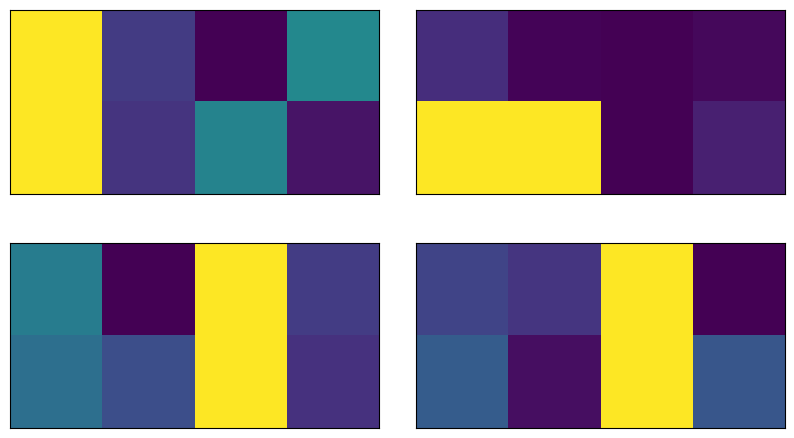

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6), subplot_kw={"xticks": [], "yticks": []})
for i in range(4):
    ax[i // 2, i % 2].imshow(images[i].reshape(2, 4), aspect="equal")
plt.subplots_adjust(wspace=0.1, hspace=0.025)

In [65]:
print(len(images))


50


In [66]:
with open(r"D:\university\quantum\Qiskit\codes\dataset.pkl", "wb") as f:
    pickle.dump((images, labels), f)
# Opens a file named "dataset.pkl" in write-binary mode ('wb')
# Saves your dataset (images and labels) into the file f.
# They’re saved as a tuple so you can load both together later.